# Performance

- performance in example for iris
- digits
- fruit example

In [38]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [39]:
iris = datasets.load_iris()

In [40]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [41]:
iris_df['target'] = iris.target

In [42]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
X = iris_df.drop('target', axis = 1)
y = iris.target

In [44]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
knn.score(iris.data, iris.target)

0.96

### Changing the Distance

In [47]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [48]:
knn.fit(X, y)
knn.score(X, y)

1.0

### Seeking the right K

In [49]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
import numpy as np

In [56]:
k = np.arange(2, 100)
params = [{'n_neighbors': k}]
kf = KFold(len(iris_df), n_folds=5)
grid = GridSearchCV(knn, param_grid = params, cv = kf)

In [58]:
grid.fit(iris.data, iris.target)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 2,  3, ..., 98, 99])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
grid.cv

sklearn.cross_validation.KFold(n=150, n_folds=5, shuffle=False, random_state=None)

In [60]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [61]:
lasso = KNeighborsClassifier()

k = [i for i in range(2, 100, 2)]
params = [{'n_neighbors': k }]
grid_search = GridSearchCV(lasso, params, cv = 5)
grid_search.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [62]:
grid_search.grid_scores_

[mean: 0.94667, std: 0.03399, params: {'n_neighbors': 2},
 mean: 0.97333, std: 0.01333, params: {'n_neighbors': 4},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 8},
 mean: 0.98000, std: 0.02667, params: {'n_neighbors': 10},
 mean: 0.98000, std: 0.02667, params: {'n_neighbors': 12},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 14},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 16},
 mean: 0.96667, std: 0.02981, params: {'n_neighbors': 18},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 20},
 mean: 0.96000, std: 0.03266, params: {'n_neighbors': 22},
 mean: 0.94667, std: 0.03399, params: {'n_neighbors': 24},
 mean: 0.94667, std: 0.03399, params: {'n_neighbors': 26},
 mean: 0.94000, std: 0.03887, params: {'n_neighbors': 28},
 mean: 0.94000, std: 0.03887, params: {'n_neighbors': 30},
 mean: 0.94667, std: 0.03399, params: {'n_neighbors': 32},
 mean: 0.95333, std: 0.02667, params: {'n_neighbors': 34},
 

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


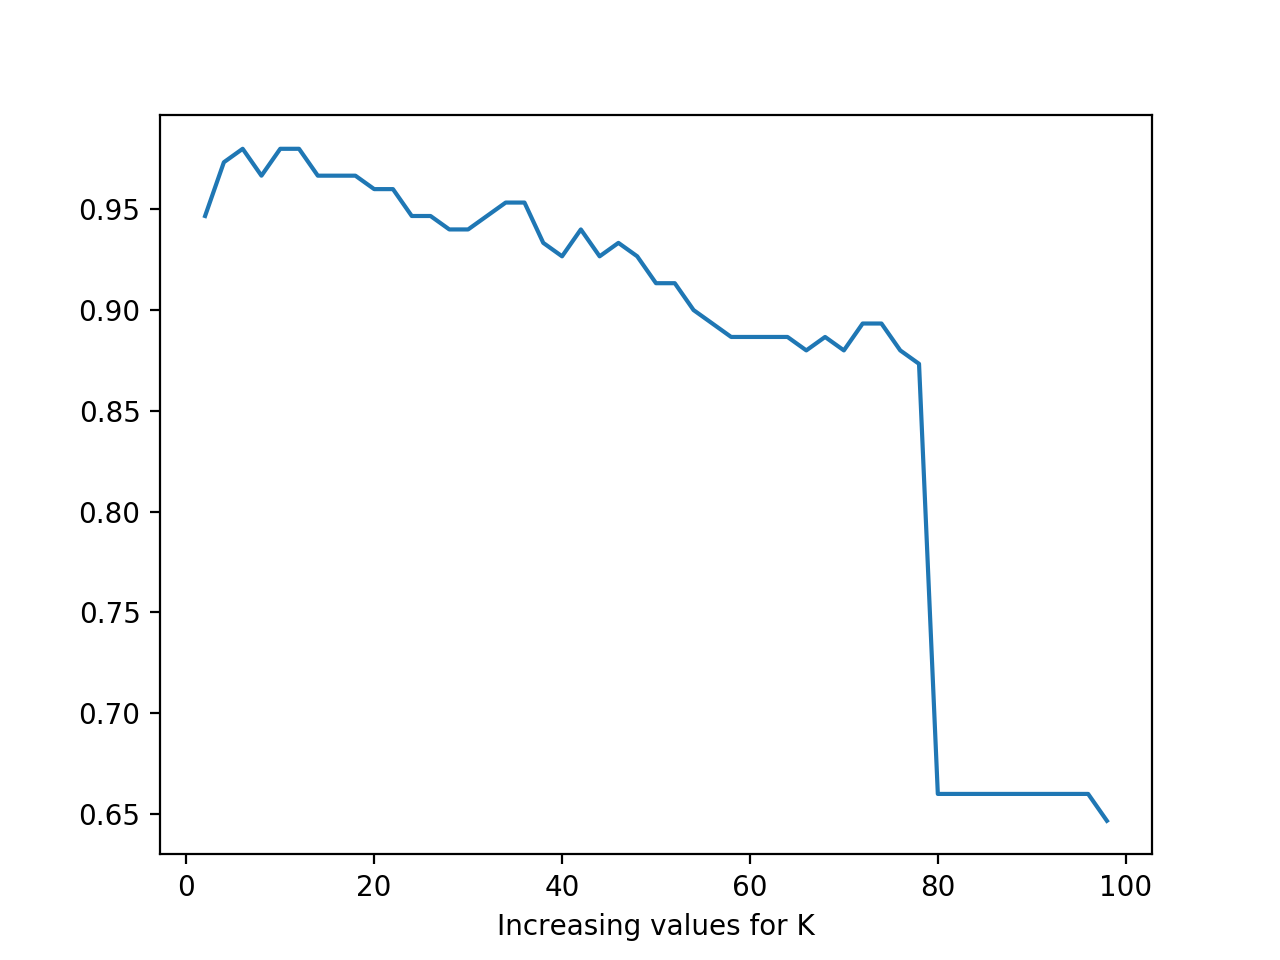

Text(0.5,0,'Increasing values for K')

In [64]:
plt.plot(k, [s[1] for s in grid_search.grid_scores_])
plt.xlabel('Increasing values for K')

### Fruit Example

In [31]:
fruit = pd.read_table('data/fruit_data_with_colors.txt')

In [32]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Problem

Generate a model to classify the fruit data using our train/test split protocol and a grid search for the appropriate number of $k$ means.

In [33]:
knn = KNeighborsClassifier()

X = fruit['color_score'].reshape(-1,1)

y = fruit['fruit_name']


k = [i for i in range(2, 10, 2)]
params = [{'n_neighbors': k }]
grid_search = GridSearchCV(lasso, params, cv = 5)
grid_search.fit(X, y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 4, 6, 8]}], pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [34]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [37]:
grid_search.score(X, y)

0.847457627118644